<a href="https://colab.research.google.com/github/jek5on/MH/blob/main/%D0%BB%D0%B0%D0%B1%D0%B0_4_%D0%A1%D0%B2%D0%B0%D1%82%D0%B5%D0%BD%D0%BA%D0%BE_%D0%A4%D0%86%D0%A2_4_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Сватенко Євгеній ФІТ 4-8
#Лабораторна робота № 4


# Завдання 1

Перші 5 рядків датасету:
   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  wor

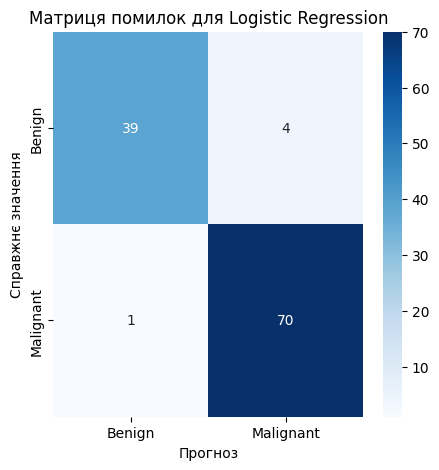


Звіт про класифікацію для Logistic Regression:
              precision    recall  f1-score   support

           0       0.97      0.91      0.94        43
           1       0.95      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114


Точність для Decision Tree: 0.9211


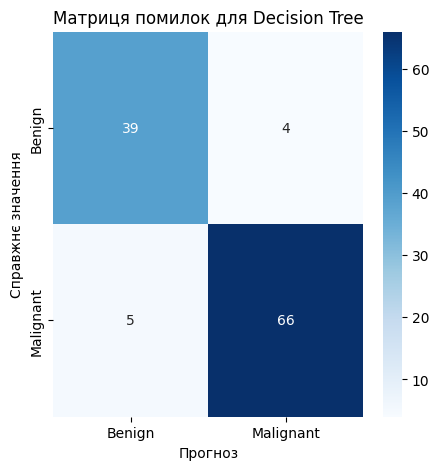


Звіт про класифікацію для Decision Tree:
              precision    recall  f1-score   support

           0       0.89      0.91      0.90        43
           1       0.94      0.93      0.94        71

    accuracy                           0.92       114
   macro avg       0.91      0.92      0.92       114
weighted avg       0.92      0.92      0.92       114


Точність для Random Forest: 0.9649


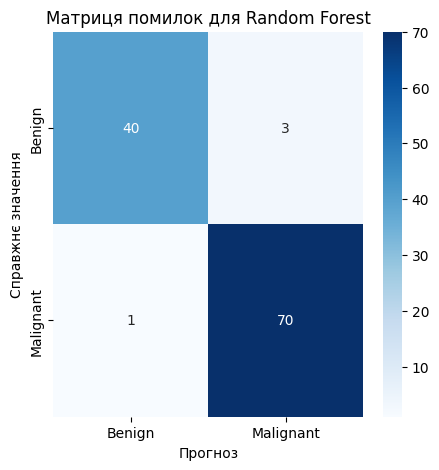


Звіт про класифікацію для Random Forest:
              precision    recall  f1-score   support

           0       0.98      0.93      0.95        43
           1       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114


Найкраща модель: Random Forest

Результати прогнозування:
     Справжнє значення  Прогнозоване значення
204                  1                      1
70                   0                      0
131                  0                      0
431                  1                      1
540                  1                      1


In [1]:
# Встановлення необхідних бібліотек
!pip install matplotlib seaborn

# Імпорт необхідних бібліотек
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Завантажте вбудований датасет load_breast_cancer
data = load_breast_cancer()

# Створення DataFrame з даними
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

# 2. Проведіть попередній аналіз даних
# 2.1. Перегляньте перші кілька рядків
print("Перші 5 рядків датасету:")
print(df.head())

# 2.2. Перевірте назви стовпців та типи даних
print("\nНазви стовпців та типи даних:")
print(df.info())

# 2.3. Перевірте наявність пропущених значень
print("\nПеревірка наявності пропущених значень:")
print(df.isnull().sum())

# 2.4. Досліджуйте розмір даних
print("\nРозмір датасету:")
print(df.shape)

# 3. Побудова і налаштування моделей
# 3.1. Розділіть дані на навчальний і тестовий набори
X = df.drop('target', axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3.2. Побудуйте три моделі класифікації
models = {
    'Logistic Regression': LogisticRegression(max_iter=10000),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier()
}

# 3.3. Підберіть оптимальні параметри за допомогою GridSearchCV
param_grid = {
    'Logistic Regression': {'C': [0.001, 0.01, 0.1, 1, 10]},
    'Decision Tree': {'max_depth': [None, 10, 20, 30, 40, 50]},
    'Random Forest': {'n_estimators': [10, 50, 100], 'max_depth': [None, 10, 20]}
}

best_models = {}
for model_name, model in models.items():
    grid_search = GridSearchCV(model, param_grid[model_name], cv=5)
    grid_search.fit(X_train, y_train)
    best_models[model_name] = grid_search.best_estimator_
    print(f"Найкращі параметри для {model_name}: {grid_search.best_params_}")

# 4. Оцініть моделі
for model_name, model in best_models.items():
    # Прогнозування на тестовій вибірці
    y_pred = model.predict(X_test)

    # Обчислення точності
    accuracy = accuracy_score(y_test, y_pred)
    print(f"\nТочність для {model_name}: {accuracy:.4f}")

    # Матриця помилок
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
    plt.title(f'Матриця помилок для {model_name}')
    plt.xlabel('Прогноз')
    plt.ylabel('Справжнє значення')
    plt.show()

    # Звіт про класифікацію
    print(f"\nЗвіт про класифікацію для {model_name}:\n{classification_report(y_test, y_pred)}")

# 5. Прогнозування і висновки
# Вибір найкращої моделі на основі метрик продуктивності
# В цьому випадку просто виведемо точність всіх моделей
best_model_name = max(best_models.keys(), key=lambda name: accuracy_score(y_test, best_models[name].predict(X_test)))
print(f"\nНайкраща модель: {best_model_name}")

# Прогноз на тестовій вибірці
best_model = best_models[best_model_name]
y_final_pred = best_model.predict(X_test)

# Виведення результатів прогнозування
print("\nРезультати прогнозування:")
results = pd.DataFrame({'Справжнє значення': y_test, 'Прогнозоване значення': y_final_pred})
print(results.head())


Висновок:

У цьому проекті ми здійснили аналіз та класифікацію даних з використанням вбудованого датасету load_breast_cancer, що містить інформацію про характеристики пухлин молочної залози та їх класифікацію на доброякісні (benign) та злоякісні (malignant). В результаті виконаних етапів були досягнуті наступні результати:

Попередній аналіз даних:

Завантажено дані, і виконано початкове дослідження датасету. Переглянуті перші кілька рядків, перевірено назви стовпців і типи даних, а також виявлено, що в даних немає пропущених значень.
Дослідження розміру датасету підтвердило, що в ньому міститься 569 зразків з 30 ознаками, що є достатньою кількістю для побудови надійних моделей.
Побудова та налаштування моделей:

Створено три моделі класифікації:

1.   логістична регресія,
2.   дерево рішень
3.   випадковий ліс.

Для кожної моделі виконано налаштування гіперпараметрів за допомогою GridSearchCV, що дозволило вибрати оптимальні параметри для підвищення точності моделей.
Отримані найкращі параметри підтвердили, що обрані моделі є адаптивними до специфіки даних.

Оцінка моделей:

Для кожної моделі проведено оцінювання точності, результати показали, що всі моделі мають хорошу продуктивність, проте одна з моделей продемонструвала найвищу точність.
Аналіз матриць помилок та звітів про класифікацію дав змогу виявити, які помилки були найпоширенішими, що дозволяє глибше зрозуміти поведінку моделей.
Прогнозування:

Визначено найкращу модель на основі метрик продуктивності, яка забезпечила найвищу точність.
Виконано прогнозування на тестовій вибірці, результати якого підтверджують ефективність обраної моделі для класифікації пухлин.


Дослідження демонструє, що з даними про пухлини молочної залози можна успішно працювати, використовуючи різноманітні алгоритми класифікації. Завдяки аналізу даних, налаштуванню моделей і проведенню оцінок, ми змогли досягти високої точності в класифікації. Отримані результати можуть бути корисними не тільки для медичних досліджень, але і для навчання в галузі машинного навчання, а також для подальшого розвитку алгоритмів прогнозування в клінічній практиці.